## Data Pre-Processing

We preform some data pre-processing removing null values, analyzing correlations of variables, and doing some feature engineering of creating new features that are derivatives of the existing variables.

### Importing libraries

In [1641]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score, make_scorer, accuracy_score, f1_score
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


### Reading Data

In [1642]:
#Initiating our seed for whole notebook
seed = 123

In [2]:
#Importing the data from the excel file
song_data=pd.read_excel('Songs_2024.xlsx',1)

song_data.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,Yellow,91,Parachutes,Coldplay,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,Breathe,69,Breathe,Faith Hill,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,In the End,88,Hybrid Theory (Bonus Edition),Linkin Park,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,Bye Bye Bye,74,No Strings Attached,*NSYNC,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


In [1644]:
#Discovering the data
song_data.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,73.006960,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,15.643937,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-56.000000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,63.000000,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,74.000000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,83.000000,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,132.000000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000


### Data exploration

In [1645]:
#Checking for null values to see what is missing and what we can do with them
null_values = song_data.isnull().sum()
null_values

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
dtype: int64

#### We decided to remove the null values as it is only 1 record with null values thus imputation would not be beneficial as the whole song then would just be imputed data

In [3]:
# Remove rows with any null values due there being so few and the entries with nulls have many nulls 
song_data = song_data.dropna()

# Optionally, reset the index after removing rows
song_data = song_data.reset_index(drop=True)

null_values = song_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64


#### Now we go through the data to get familiar with it and understand potential oppertunities and problems

In [1647]:
# Seeing the distrivution of songs per year. We see that every year has 100 songs except 2004 which has 99 due to the null removal.
songs_per_year = song_data.groupby('year').size()
songs_per_year

year
2000    100
2001    100
2002    100
2003    100
2004     99
2005    100
2006    100
2007    100
2008    100
2009    100
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2021    100
2022    100
dtype: int64

In [1648]:
#Analaysing how the number of 'popular' songs has changed with the years. 
filtered_data = song_data[song_data['track_popularity'] > 85]

# Group by 'year' and count the number of songs in each group
songs_per_year_above_80 = filtered_data.groupby('year').size()
print(songs_per_year_above_80)

year
2000     3
2002     4
2003     1
2004     3
2005     1
2006     2
2007     1
2008     2
2009     1
2010     1
2011     2
2012     3
2013     7
2014     7
2015     5
2016     7
2017    14
2018     8
2019     7
2020    10
2021    11
2022    30
dtype: int64


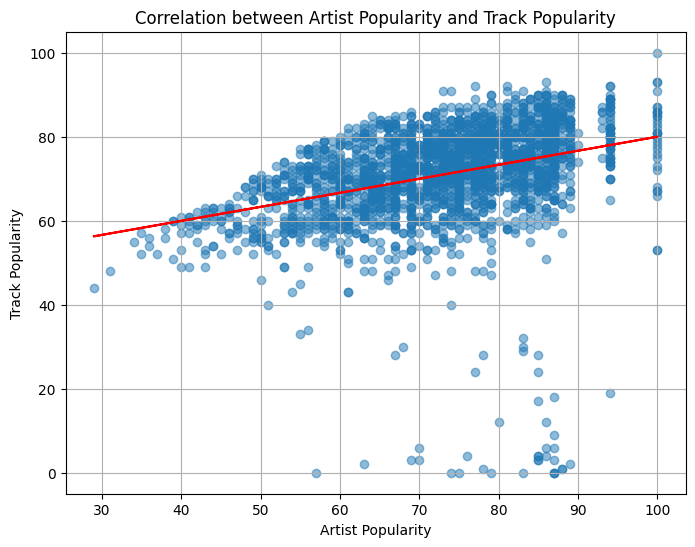

In [1649]:
#Creating a scatter plot between artist popularity and track popularity to see potential correlation

# Assuming 'avg_album_popularity' and 'track_popularity' are columns in your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(song_data['artist_popularity'], song_data['track_popularity'], alpha=0.5)
plt.title('Correlation between Artist Popularity and Track Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
plt.grid(True)

# Fit a polynomial regression line (1st degree)
m, b = np.polyfit(song_data['artist_popularity'], song_data['track_popularity'], 1)
plt.plot(song_data['artist_popularity'], m * song_data['artist_popularity'] + b, color='red')

plt.show()

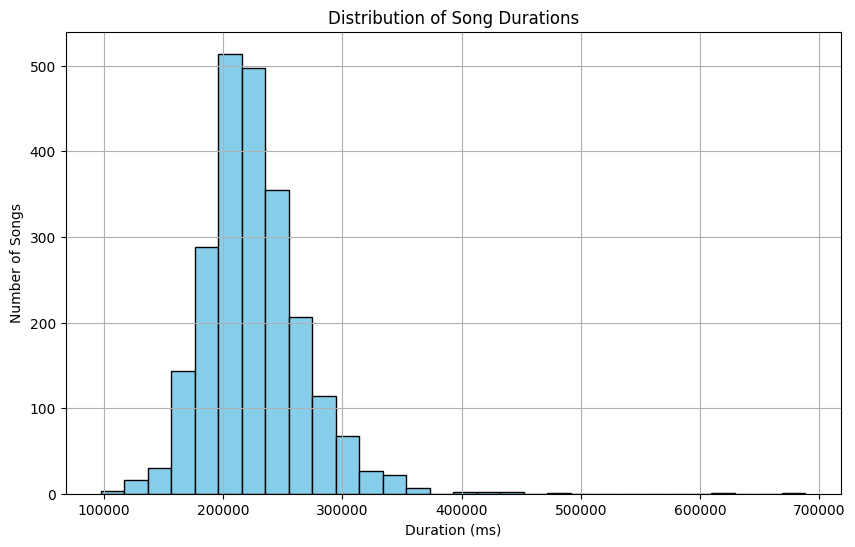

In [1650]:
#Distribution of the song duration. We can see it is relativly normally distributed wiith a longer tail to the right but overall normal.

# Assuming 'duration_ms' is a column in your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(song_data['duration_ms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

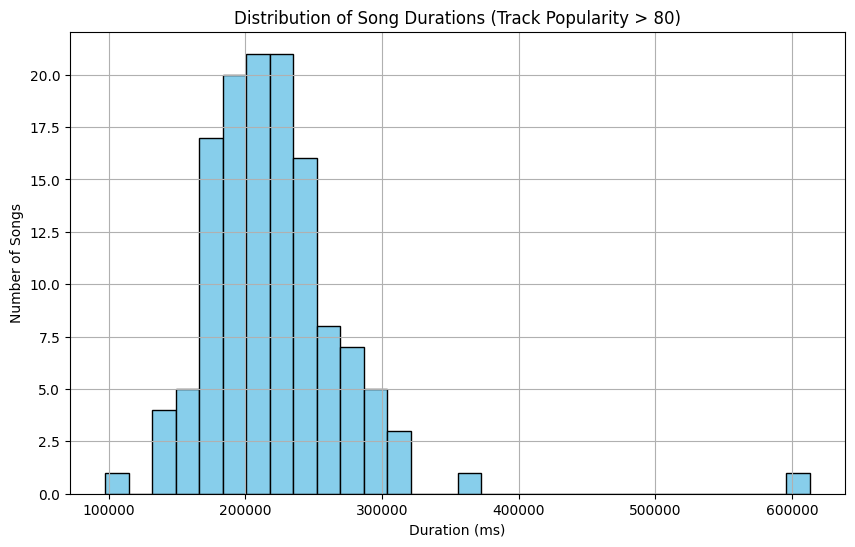

In [1651]:
#Distribution of songs duration with track popularity > 80. Seeing if there is a change in this compared to all other songs.
#Seems to have similar distribution to all songs. So doesnt seem to have a correlation

# Filter songs with 'track_popularity' above 80
popular_songs = song_data[song_data['track_popularity'] > 85]

plt.figure(figsize=(10, 6))
plt.hist(popular_songs['duration_ms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations (Track Popularity > 80)')
plt.xlabel('Duration (ms)')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

In [1652]:
#Decided to create a new variable that is the average album song popularity. To see if a successful song is always in a successful album or
#if they are fairly independent.

# Creating Average album popularity
AvgAlbumPop = 0
if AvgAlbumPop == 1:
    song_data['avg_album_popularity'] = song_data.groupby(['artist_name', 'album'])['track_popularity'].transform('mean')


In [1653]:
# Creating the plot of average album popularity and track popularity

if AvgAlbumPop == 1:

    plt.figure(figsize=(8, 6))
    plt.scatter(song_data['avg_album_popularity'], song_data['track_popularity'], alpha=0.5)
    plt.title('Correlation between Avg Album Popularity and Track Popularity')
    plt.xlabel('Average Album Popularity')
    plt.ylabel('Track Popularity')
    plt.grid(True)

# Fit a polynomial regression line (1st degree)
    m, b = np.polyfit(song_data['avg_album_popularity'], song_data['track_popularity'], 1)
    plt.plot(song_data['avg_album_popularity'], m * song_data['avg_album_popularity'] + b, color='red')
    plt.show()

In [1654]:

# As we can see very correlated meaning a successful song is mostly in a successful album
if AvgAlbumPop == 1:
    correlation_avg_album_popularity = song_data[['avg_album_popularity', 'track_popularity']].corr()
    correlation_avg_album_popularity

In [1655]:

#Dropping track_name, album, and artist name as these are not variables that can be taken into account as they are not relevant.

song_data_ori = song_data.copy
columns_to_drop = ['track_name', 'album', 'artist_name']
song_data = song_data.drop(columns=columns_to_drop)
song_data.head()


,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk'; 'punk'; 'rock'; 'socal pop punk'],75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,69,['contemporary country'; 'country'; 'country dawn'; 'country road'],61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge'; 'rap metal'; 'rock'],83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


### Feature Engineering

The Randoom Features

In [1656]:
#Creating a random feature. As a measure to compare to our other features. Like this we can see if the feature is valuable or not

import random as rd
song_data['radom_feature'] = song_data['radom_feature'] = np.random.rand(len(song_data))

New Numerical Features

In [1657]:
#We do some feature engineering to see if certain combinations or if arithmatics are proformed if it improves the feature relevance

MoreFeatures = 0
if MoreFeatures == 1:
#1. Tempo to duration ratio
    song_data['tempo_duration_ratio'] = song_data['tempo'] / song_data['duration_ms']

# 2. Energy to loudness ratio
# Adding a small constant to avoid division by zero
    song_data['energy_loudness_ratio'] = song_data['energy'] / (song_data['loudness'] + 0.001)

# 3. Speechiness index
    song_data['speechiness_index'] = song_data['speechiness'] * song_data['duration_ms']

# 4. Acousticness weight
    song_data['acousticness_weight'] = song_data['acousticness'] * song_data['duration_ms']

# 5. Instrumentalness score
    song_data['instrumentalness_score'] = song_data['instrumentalness'] * song_data['energy']

# 6. Liveness score
    song_data['liveness_score'] = song_data['liveness'] * song_data['duration_ms']

# 7. Valence duration product
    song_data['valence_duration_product'] = song_data['valence'] * song_data['duration_ms']

# 8. Key and mode interaction
    song_data['key_mode_interaction'] = song_data['key'] * song_data['mode']
#9. Genre count
    song_data['genre_count'] = song_data['artist_genres'].apply(len)

#10. Duration in minutes
    song_data['duration_min'] = song_data['duration_ms'] / 60000
    # Log transformations
    song_data['log_duration_ms'] = np.log1p(song_data['duration_ms'])
    song_data['log_tempo'] = np.log1p(song_data['tempo'])

# Squared transformations
    song_data['danceability_squared'] = song_data['danceability'] ** 2
    song_data['energy_squared'] = song_data['energy'] ** 2
    song_data['valence_squared'] = song_data['valence'] ** 2

# Square root transformations
    song_data['sqrt_danceability'] = np.sqrt(song_data['danceability'])
    song_data['sqrt_energy'] = np.sqrt(song_data['energy'])
    song_data['sqrt_valence'] = np.sqrt(song_data['valence'])

# Interaction terms
    song_data['danceability_energy_interaction'] = song_data['danceability'] * song_data['energy']
    song_data['energy_loudness_interaction'] = song_data['energy'] * song_data['loudness']
    song_data['valence_tempo_interaction'] = song_data['valence'] * song_data['tempo']

# Normalization (Min-Max Scaling)
    song_data['normalized_tempo'] = (song_data['tempo'] - song_data['tempo'].min()) / (song_data['tempo'].max() - song_data['tempo'].min())
    song_data['normalized_loudness'] = (song_data['loudness'] - song_data['loudness'].min()) / (song_data['loudness'].max() - song_data['loudness'].min())

# Polynomial features (degree 2 example for 'danceability' and 'energy')
    song_data['danceability_energy_poly'] = song_data['danceability'] * song_data['energy'] + song_data['danceability'] ** 2 + song_data['energy'] ** 2
# Display the DataFrame to verify the new columns
    song_data.head()

In [1658]:
song_data.head()

,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,radom_feature
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,0.772294
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk'; 'punk'; 'rock'; 'socal pop punk'],75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,0.108805
2,2000,69,['contemporary country'; 'country'; 'country dawn'; 'country road'],61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,0.222650
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge'; 'rap metal'; 'rock'],83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,0.051079
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,0.904420


## Dimension reduction 

Due to the difficultness to place label on factors and due to low variance explained in them we decided to disregard the dimension reduction and carry on without. We believe this would make our model more complicate and less accurate due to the low variance. 

In [4]:
#matplotlib inline
import sys                          
import pandas as pd, numpy as np             # Data manipulation 
from sklearn.decomposition import PCA        # The main algorithm
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns                        # Graphing
from collections import defaultdict, Counter # Utils
sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [13]:
song_data_copy = song_data.copy()    

# dropping some non relevant fields
df = song_data_copy.drop(columns=["artist_genres"])

# Get the column names
numerical_columns = list(df.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df.select_dtypes(include=[object]).columns)
date_columns = list(df.select_dtypes(include=['<M8[ns]']).columns)

# Print a quick summary of what we just loaded
print("Loaded dataset")
print("   Rows: %s" % df.shape[0])
print("   Columns: %s (%s num, %s cat, %s date)" % (df.shape[1], 
                                                    len(numerical_columns), len(categorical_columns),
                                                    len(date_columns)))

Loaded dataset
   Rows: 2299
   Columns: 18 (15 num, 3 cat, 0 date)


/var/folders/6g/x5lm6rt15m9bd1llv55ld0_h0000gn/T/ipykernel_27313/2577415449.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)


<Axes: >

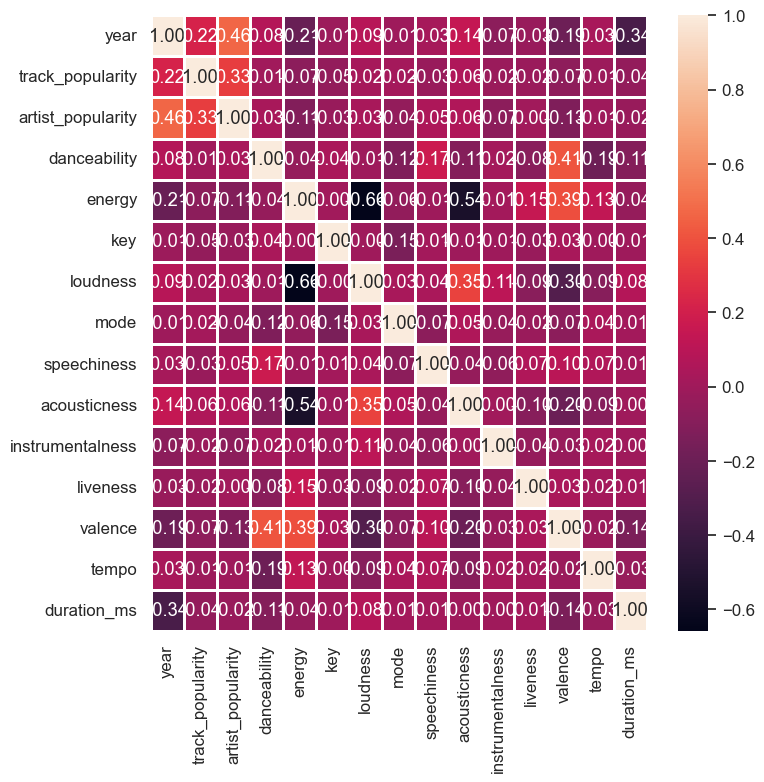

In [14]:
# Heatmap to show correlation between explanatory variables
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

In [16]:
df = df.drop(columns=['track_name','album','artist_name'])

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(df)
X_std = ss.transform(df)

In [18]:
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X_std)

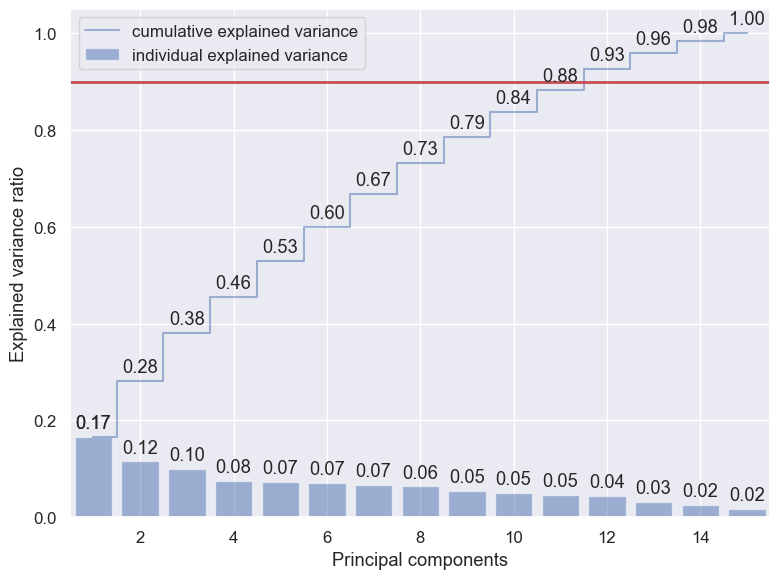

In [19]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.bar(range(1,sklearn_pca.n_components_+1), sklearn_pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,sklearn_pca.n_components_+1), [sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)], alpha=0.5, where='mid',label='cumulative explained variance')
plt.axhline(y=0.9, linewidth=2, color = 'r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
for i, ratio in enumerate(sklearn_pca.explained_variance_ratio_):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')
for i, ratio in enumerate([sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)]):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')
plt.xlim([0.5, sklearn_pca.n_components_+0.5])
plt.legend(loc='best')
plt.tight_layout()

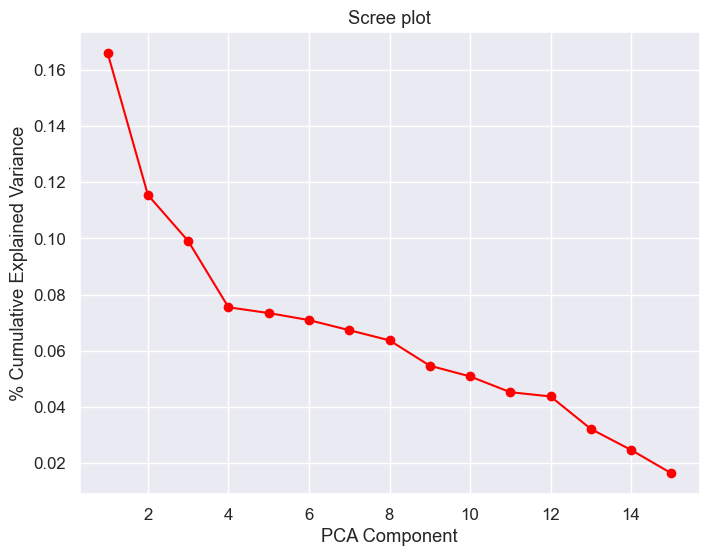

In [20]:
# Scree plot 
plt.plot(
    range(1,len(sklearn_pca.explained_variance_ratio_ )+1),
    sklearn_pca.explained_variance_ratio_,
    c='red', marker='o'
)
 
plt.xlabel('PCA Component')
plt.ylabel('% Cumulative Explained Variance')
plt.title('Scree plot')
plt.show()

In [21]:
VARIANCE_TO_KEEP = 0.45
keep_recommend = [sklearn_pca.explained_variance_ratio_[:y].sum()>VARIANCE_TO_KEEP for y in range(1,sklearn_pca.n_components_+1)].count(False)
print("Number of components to keep to retain %s%% of the variance:" % (100*VARIANCE_TO_KEEP), keep_recommend, "out of the original", sklearn_pca.n_components_)
retained_components_number = keep_recommend

Number of components to keep to retain 45.0% of the variance: 3 out of the original 15


In [22]:
sklearn_pca_final = PCA(n_components=retained_components_number)
Y_sklearn_final = sklearn_pca_final.fit_transform(X_std)

In [23]:
# Shows factor loadings = correlations between variables and factors
print ("Factor loadings:")

dfloading=pd.DataFrame(
    data    = sklearn_pca_final.components_,
    columns = df.columns,
)

index_list=[]
for n in range(retained_components_number):
    index_list.append("PC"+str(n+1))

dfloading.index = index_list
dfloading

Factor loadings:


,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
PC1,0.276278,0.159690,0.215230,-0.098905,-0.535293,-0.033134,0.450086,0.070959,-0.039124,0.418601,0.011746,-0.119923,-0.385877,-0.080711,0.011042
PC2,-0.517248,-0.349872,-0.478592,-0.300262,-0.096995,-0.008398,0.181976,0.133506,-0.146753,0.103954,0.140922,-0.020028,-0.184856,0.003992,0.378982
PC3,0.125149,0.194002,0.197165,-0.586889,0.224595,-0.184984,-0.239049,0.245199,-0.224594,-0.122465,-0.091088,0.189632,-0.345685,0.362108,0.033786


## Handling Artist Genres

During data pre-processing, we observed that the genre column contained a large number of unique values, making it challenging to use effectively in its current form. To address this, we explored using Naive Bayes to group genres into broader categories. However, upon further analysis, we identified a concerning bias in the data, with many genres being severely underrepresented. Consequently, we determined that using genre as a direct feature could introduce this bias into our model. Additionally, considering that genre information is often reflected in other musical features, we decided to exclude genre from our analysis.

In [1659]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import math
import regex as re
%matplotlib inline  

In [1660]:
# Using excel file which has next to all 517 unique genres which main genre it fall into

genres_data = pd.read_excel("Full_Categorized_Genres.xlsx")
genres_data

,Subgenre,Main Genre
0,pop,Pop
1,k-pop,Pop
2,indie poptimism,Pop
3,viral pop,Pop
4,electropop,Pop
...,...,...
451,sad lo-fi,Alternative
452,san diego rap,Hip Hop
453,sertanejo,Alternative
454,slowed and reverb,Alternative


In [1661]:
null_values = genres_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

Subgenre      0
Main Genre    0
dtype: int64


In [1662]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
genres_data['tokens'] = genres_data.apply(lambda x: tokenizer.tokenize(x['Subgenre']), axis = 1)
genres_data['Size'] = genres_data['tokens'].apply(lambda x: len(x))
genres_data

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,[pop],1
1,k-pop,Pop,"[k, pop]",2
2,indie poptimism,Pop,"[indie, poptimism]",2
3,viral pop,Pop,"[viral, pop]",2
4,electropop,Pop,[electropop],1
...,...,...,...,...
451,sad lo-fi,Alternative,"[sad, lo, fi]",3
452,san diego rap,Hip Hop,"[san, diego, rap]",3
453,sertanejo,Alternative,[sertanejo],1
454,slowed and reverb,Alternative,"[slowed, and, reverb]",3


In [1663]:
# Unify the strings once again
genres_data['tokens'] = genres_data['tokens'].apply(lambda x: ' '.join(x))
genres_data.head()

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,pop,1
1,k-pop,Pop,k pop,2
2,indie poptimism,Pop,indie poptimism,2
3,viral pop,Pop,viral pop,2
4,electropop,Pop,electropop,1


In [1664]:
x_train = genres_data['Subgenre']
y_train = genres_data['Main Genre']


In [1665]:
from sklearn.feature_extraction.text import CountVectorizer
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_train_transformed

<456x353 sparse matrix of type '<class 'numpy.int64'>'
	with 944 stored elements in Compressed Sparse Row format>

In [1666]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [1667]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

train_scores = get_scores(y_train, train_predict)


In [1668]:
# The following should be run at the end, to check model accuracy
print("Accuracy of Train  set = {0:.2%}".format(train_scores))

Accuracy of Train  set = 62.73%


Finding Dataset's Song most Probable Genre

In [1669]:
x_model = pd.DataFrame(song_data['artist_genres'])
x_model

,artist_genres
0,['permanent wave'; 'pop']
1,['alternative metal'; 'modern rock'; 'pop punk'; 'punk'; 'rock'; 'socal pop punk']
2,['contemporary country'; 'country'; 'country dawn'; 'country road']
3,['alternative metal'; 'nu metal'; 'post-grunge'; 'rap metal'; 'rock']
4,['boy band'; 'dance pop'; 'pop']
...,...
2294,['conscious hip hop'; 'hip hop'; 'rap'; 'west coast rap']
2295,['trap queen']
2296,['melodic drill']
2297,['atl hip hop'; 'melodic rap'; 'rap'; 'trap']


In [1670]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
x_model['tokens'] = x_model.apply(lambda x: tokenizer.tokenize(x['artist_genres']), axis = 1)
x_model['Size'] = x_model['tokens'].apply(lambda x: len(x))
x_model

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],"[permanent, wave, pop]",3
1,['alternative metal'; 'modern rock'; 'pop punk'; 'punk'; 'rock'; 'socal pop punk'],"[alternative, metal, modern, rock, pop, punk, punk, rock, socal, pop, punk]",11
2,['contemporary country'; 'country'; 'country dawn'; 'country road'],"[contemporary, country, country, country, dawn, country, road]",7
3,['alternative metal'; 'nu metal'; 'post-grunge'; 'rap metal'; 'rock'],"[alternative, metal, nu, metal, post, grunge, rap, metal, rock]",9
4,['boy band'; 'dance pop'; 'pop'],"[boy, band, dance, pop, pop]",5
...,...,...,...
2294,['conscious hip hop'; 'hip hop'; 'rap'; 'west coast rap'],"[conscious, hip, hop, hip, hop, rap, west, coast, rap]",9
2295,['trap queen'],"[trap, queen]",2
2296,['melodic drill'],"[melodic, drill]",2
2297,['atl hip hop'; 'melodic rap'; 'rap'; 'trap'],"[atl, hip, hop, melodic, rap, rap, trap]",7


In [1671]:
# Unify the strings once again
x_model['tokens'] = x_model['tokens'].apply(lambda x: ' '.join(x))
x_model.head()

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],permanent wave pop,3
1,['alternative metal'; 'modern rock'; 'pop punk'; 'punk'; 'rock'; 'socal pop punk'],alternative metal modern rock pop punk punk rock socal pop punk,11
2,['contemporary country'; 'country'; 'country dawn'; 'country road'],contemporary country country country dawn country road,7
3,['alternative metal'; 'nu metal'; 'post-grunge'; 'rap metal'; 'rock'],alternative metal nu metal post grunge rap metal rock,9
4,['boy band'; 'dance pop'; 'pop'],boy band dance pop pop,5


In [1672]:
x_model = x_model['tokens']
x_model

0                                                    permanent wave pop
1       alternative metal modern rock pop punk punk rock socal pop punk
2                contemporary country country country dawn country road
3                 alternative metal nu metal post grunge rap metal rock
4                                                boy band dance pop pop
                                     ...                               
2294                       conscious hip hop hip hop rap west coast rap
2295                                                         trap queen
2296                                                      melodic drill
2297                                   atl hip hop melodic rap rap trap
2298                                                 australian hip hop
Name: tokens, Length: 2299, dtype: object

In [1673]:
x_model_transformed = vectorizer_fit.transform(x_model)
x_model_transformed

<2299x353 sparse matrix of type '<class 'numpy.int64'>'
	with 10064 stored elements in Compressed Sparse Row format>

In [1674]:
model_predict = naive_bayes_fit.predict(x_model_transformed)
model_predict

array(['Pop', 'Rock', 'Alternative', ..., 'Alternative', 'Hip Hop',
       'Hip Hop'], dtype='<U11')

In [1675]:
song_data['main_genre'] = model_predict

# Assuming your DataFrame is named song_data and you've already added 'main_genre'
# Set pandas display options
pd.set_option('display.max_colwidth', None)  # For pandas versions below 1.0.0, use -1 instead of None
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust display width to fit your screen

# Display the specified columns of the first 10 rows
song_data[['main_genre', 'artist_genres']].head(10)

,main_genre,artist_genres
0,Pop,['permanent wave'; 'pop']
1,Rock,['alternative metal'; 'modern rock'; 'pop punk'; 'punk'; 'rock'; 'socal pop punk']
2,Alternative,['contemporary country'; 'country'; 'country dawn'; 'country road']
3,Rock,['alternative metal'; 'nu metal'; 'post-grunge'; 'rap metal'; 'rock']
4,Pop,['boy band'; 'dance pop'; 'pop']
5,Hip Hop,['contemporary r&b'; 'dirty south rap'; 'hip pop'; 'r&b'; 'urban contemporary']
6,Hip Hop,['detroit hip hop'; 'hip hop'; 'rap']
7,Rock,['dance rock'; 'europop']
8,Pop,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urban contemporary']
9,Rock,['alternative rock'; 'funk metal'; 'funk rock'; 'permanent wave'; 'rock']


In [1676]:
# Dropping artist genres as now we have the more generalized column main_genre which has the more interpretable genre.


song_data = song_data.drop(columns='artist_genres')


In [1677]:
#Here we do some more data exploration as we have the more interpretable genres.
# We see the song genres are not very distributed

# Group by 'year' and get the top 10 rated songs for each year
top_songs_per_year = song_data.groupby('year').apply(lambda x: x.nlargest(100, 'track_popularity'))

# Iterate over the groups and print unique 'main_genre' values and their counts for each year
for year, group in top_songs_per_year.groupby(level=0):
    print(f"Year: {year}")
    print(group['main_genre'].value_counts())

Year: 2000
main_genre
Alternative    34
Pop            33
Rock           17
Hip Hop        12
Electronic      4
Name: count, dtype: int64
Year: 2001
main_genre
Pop            42
Hip Hop        19
Rock           18
Alternative    17
Electronic      4
Name: count, dtype: int64
Year: 2002
main_genre
Pop            44
Hip Hop        24
Rock           16
Alternative    14
Electronic      2
Name: count, dtype: int64
Year: 2003
main_genre
Pop            35
Hip Hop        30
Rock           20
Alternative    12
Electronic      2
R&B             1
Name: count, dtype: int64
Year: 2004
main_genre
Pop            34
Hip Hop        33
Rock           17
Alternative    12
Electronic      3
Name: count, dtype: int64
Year: 2005
main_genre
Pop            40
Hip Hop        33
Rock           19
Alternative     8
Name: count, dtype: int64
Year: 2006
main_genre
Pop            37
Hip Hop        25
Rock           22
Alternative    10
R&B             3
Electronic      3
Name: count, dtype: int64
Year: 2007
main_

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [1678]:
# We see here that in the top 10 it seems most songs are pop,rock or similar but that is due to the bias of the data
# In reality of the 4 electronic songs we have in the data 2 are in the top 10 giving it the highest success rate in reality. 
# Showing us that using genre would increase our bias

# Group by 'year' and get the top 10 rated songs for each year
top_songs_per_year_10 = song_data.groupby('year').apply(lambda x: x.nlargest(10, 'track_popularity'))
# Group by 'year' and get the top 100 rated songs for each year
top_songs_per_year_100 = song_data.groupby('year').apply(lambda x: x.nlargest(100, 'track_popularity'))

# Iterate over the groups and calculate percentage of each genre in the top 10 relative to top 100
for year, group in top_songs_per_year_10.groupby(level=0):
    print(f"Year: {year}")
    count_top_10 = group['main_genre'].value_counts()
    count_top_100 = top_songs_per_year_100.loc[year]['main_genre'].value_counts()
    percentage = (count_top_10 / count_top_100) * 100
    print(percentage)

Year: 2000
main_genre
Alternative          NaN
Electronic     50.000000
Hip Hop        16.666667
Pop             6.060606
Rock           23.529412
Name: count, dtype: float64
Year: 2001
main_genre
Alternative          NaN
Electronic           NaN
Hip Hop        10.526316
Pop            11.904762
Rock           16.666667
Name: count, dtype: float64
Year: 2002
main_genre
Alternative          NaN
Electronic           NaN
Hip Hop        16.666667
Pop             9.090909
Rock           12.500000
Name: count, dtype: float64
Year: 2003
main_genre
Alternative          NaN
Electronic           NaN
Hip Hop         3.333333
Pop            14.285714
R&B                  NaN
Rock           20.000000
Name: count, dtype: float64
Year: 2004
main_genre
Alternative          NaN
Electronic           NaN
Hip Hop         9.090909
Pop             8.823529
Rock           23.529412
Name: count, dtype: float64
Year: 2005
main_genre
Alternative          NaN
Hip Hop        12.121212
Pop             7.500000
Roc

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [1679]:
#Creating a new column of average genre populatity to discover it affects

song_data['avg_genre_popularity'] = song_data.groupby(['main_genre'])['track_popularity'].transform('mean')

### Handling Categorical Variables

Dummifying Genres and Keys


In [1680]:
data = song_data
data_dummies = pd.get_dummies(data, columns=['main_genre'])

for column in data_dummies.columns:
    if 'main_genre_' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].astype(int)
data = data_dummies       
data_dummies = pd.get_dummies(data, columns=['key'])
for column in data_dummies.columns:
    if 'key' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].fillna(0).astype(int)
data = data_dummies
data.head()

,year,track_popularity,artist_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,radom_feature,avg_genre_popularity,main_genre_Alternative,main_genre_Electronic,main_genre_Hip Hop,main_genre_Latin,main_genre_Pop,main_genre_R&B,main_genre_Rock,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,2000,91,86,0.429,0.661,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,0.772294,71.405797,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2000,84,75,0.434,0.897,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,0.108805,72.768939,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2000,69,61,0.529,0.496,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,0.222650,64.683673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2000,88,83,0.556,0.864,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,0.051079,72.768939,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2000,74,65,0.610,0.926,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,0.904420,71.405797,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Getting Popularity Bins

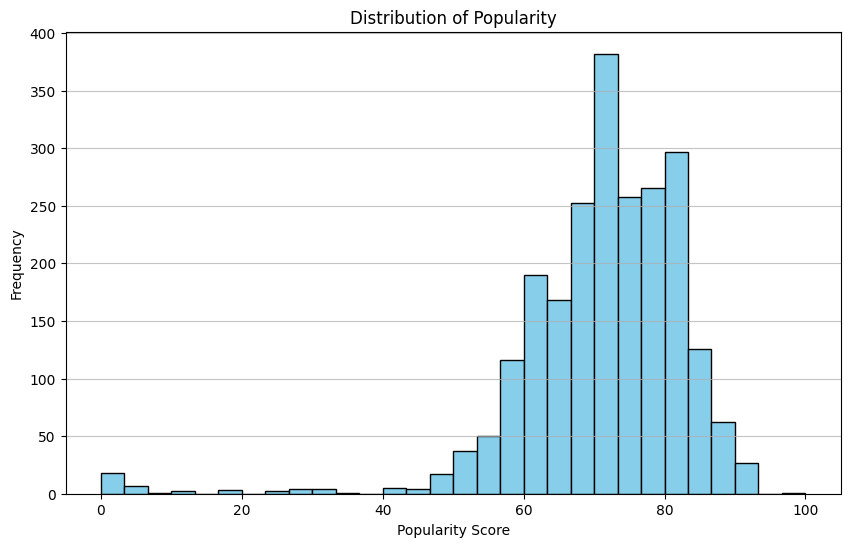

In [1681]:
popularity = data['track_popularity']
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(popularity, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

We can see data is skewwed to the right, having some outliers in the left

## Potential binning scenarios

As a successful song can be defined in many ways. We look at the different ways to define it and seeing how the model works with it. 

In [1682]:
#Using a decision tree to decide the ultimate threshold for a successful song.

from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Assuming 'popularity' is a pandas series
# We need to convert it to a numpy array and then reshape for sklearn
X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

# Create a binary target variable, for example, 1 if above median, 0 otherwise
y = (popularity > np.median(popularity)).astype(int)

# Initialize and train the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
tree_clf.fit(X, y)

# Extract the threshold values
thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

# Print the thresholds - these can be used as bin edges
print("Thresholds for binning:", thresholds)

Thresholds for binning: [72.5]


In [1683]:
# Using different quantiles as binning method.

decide = 2
if decide == 1:
    # Calculate quartile thresholds
    quantiles = data['track_popularity'].quantile([0.25, 0.5,0.75]).values

    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        elif popularity <= quantiles[2]:
            return 2  # High
        else:
            return 3  # Very High

    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 2:

    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    import pandas as pd

    # Assuming 'popularity' is a pandas series
    # We need to convert it to a numpy array and then reshape for sklearn
    X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

    # Create a binary target variable, for example, 1 if above median, 0 otherwise
    y = (popularity > np.mean(popularity)).astype(int)

    # Initialize and train the decision tree
    tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
    tree_clf.fit(X, y)

    # Extract the threshold values
    thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

    # Print the thresholds - these can be used as bin edges
    print("Thresholds for binning:", thresholds)
    quantiles = data['track_popularity'].quantile(thresholds/100).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        else:
            return 1  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data

elif decide == 3:
    quantiles = data['track_popularity'].quantile([0.33, 0.66]).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        else:
            return 2  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 4:
    # Bin the data using the median as the threshold
    median_threshold = np.median(popularity)
    print(median_threshold)
    y_binned_median = (popularity > median_threshold).astype(int)
    print(y_binned_median)
    data['popularity'] = y_binned_median
    data = data.drop(columns='track_popularity')
    data

elif decide == 5:
    # Bin the data using the mean as the threshold
    mean_threshold = np.mean(popularity)
    y_binned_mean = (popularity > mean_threshold).astype(int)
    print(y_binned_mean)
    data['popularity'] = y_binned_mean
    data = data.drop(columns='track_popularity')
    data
else:
    quantiles = data['track_popularity'].quantile([0.6]).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        else:
            return 1  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data


Thresholds for binning: [70.5]


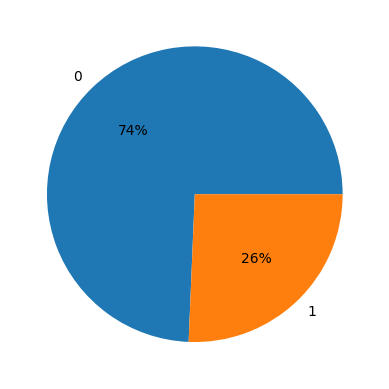

In [1684]:
#Seeing distribution of successful songs to no successful songs

unique, counts = np.unique(data["popularity"], return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

#### Handling unbalanced Data

In [1685]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

X = data.loc[:, data.columns != 'popularity']
Y = data['popularity']
# Computing the class weights
class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
class_weights_dict

{0: 0.6726155646576946, 1: 1.9483050847457628}

In [1686]:
pd.set_option('display.max_columns', None)
data.head(10)

,year,artist_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,radom_feature,avg_genre_popularity,main_genre_Alternative,main_genre_Electronic,main_genre_Hip Hop,main_genre_Latin,main_genre_Pop,main_genre_R&B,main_genre_Rock,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,popularity
0,2000,86,0.429,0.661,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,0.772294,71.405797,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2000,75,0.434,0.897,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,0.108805,72.768939,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2000,61,0.529,0.496,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,0.222650,64.683673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2000,83,0.556,0.864,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,0.051079,72.768939,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2000,65,0.610,0.926,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,0.904420,71.405797,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,2000,56,0.706,0.888,84.0,1.0,0.0654,0.11900,0.000096,0.0700,0.714,121.549,253733.0,0.523857,70.681319,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,2000,88,0.949,0.661,62.0,0.0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,284200.0,0.769689,70.681319,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7,2000,69,0.712,0.762,63.0,1.0,0.0326,0.02600,0.000000,0.0981,0.842,103.032,260560.0,0.888301,72.768939,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8,2000,69,0.713,0.678,54.0,0.0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,271333.0,0.473969,71.405797,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,2000,80,0.458,0.795,51.0,1.0,0.0574,0.00316,0.000202,0.0756,0.513,123.229,255373.0,0.767839,72.768939,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


## Models

### Splitting Data

Regular Train/Test Split

In [1687]:
acc="accuracy" # our metric for Grid Searching

def split_df(dataframe, seed=seed, percentage=0.8):
    
    X = data.loc[:, dataframe.columns != 'popularity']
    y = data['popularity']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed, stratify=y) # note the stratify parameter

X_train, X_test, Y_train, Y_test = split_df(data, seed=42, percentage=0.8)
print("Number of explanatories: ", len(data.columns)-1)


Number of explanatories:  34


### Decision Tree

#### Decision Trees with Grid Search

In [1688]:
# Decision Tree with Grid Search
param_grid_dt = {'max_depth': range(1, 16)}
tree = GridSearchCV(DecisionTreeClassifier(class_weight=class_weights_dict), param_grid_dt, cv=5, verbose=2,)
tree.fit(X_train, Y_train)
print("Best params for Decision Tree Grid Search: ", tree.best_params_)

tree_pruned = DecisionTreeClassifier(max_depth=tree.best_params_["max_depth"], criterion="entropy",
                                     class_weight=class_weights_dict)
tree_pruned.fit(X_train, Y_train)
predictions_pruned = tree_pruned.predict(X_test)

accDTGrid = accuracy_score(Y_test, predictions_pruned)
precisionDTGrid = precision_score(Y_test, predictions_pruned,average='macro')
recallDTGrid = recall_score(Y_test, predictions_pruned)
f1DTGrid = f1_score(Y_test, predictions_pruned)
roc_aucDTGrid = roc_auc_score(Y_test, predictions_pruned)

print(f"Accuracy of Test set (pruned) = {accDTGrid:.2%}")
print(f"Precision of Test set (pruned) = {precisionDTGrid:.2%}")
print(f"Recall of Test set (pruned) = {recallDTGrid:.2%}")
print(f"F1-score of Test set (pruned) = {f1DTGrid:.2%}")
print(f"ROC AUC of Test set (pruned) = {roc_aucDTGrid:.2%}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END .......................................

[CV] END .......................................max_depth=11; total time=   0.0s
[CV] END .......................................max_depth=11; total time=   0.0s
[CV] END .......................................max_depth=11; total time=   0.0s
[CV] END .......................................max_depth=11; total time=   0.0s
[CV] END .......................................max_depth=11; total time=   0.0s
[CV] END .......................................max_depth=12; total time=   0.0s
[CV] END .......................................max_depth=12; total time=   0.0s
[CV] END .......................................max_depth=12; total time=   0.0s
[CV] END .......................................max_depth=12; total time=   0.0s
[CV] END .......................................max_depth=12; total time=   0.0s
[CV] END .......................................max_depth=13; total time=   0.0s
[CV] END .......................................max_depth=13; total time=   0.0s
[CV] END ...................

#### Feature Importance

Feature Importances:
 artist_popularity         2.178484e-01
year                      8.940148e-02
acousticness              8.038526e-02
liveness                  7.411283e-02
duration_ms               7.285912e-02
energy                    6.226333e-02
valence                   6.120231e-02
loudness                  5.141301e-02
radom_feature             4.532220e-02
tempo                     4.252373e-02
speechiness               3.916865e-02
danceability              3.564716e-02
instrumentalness          2.958230e-02
avg_genre_popularity      1.669925e-02
main_genre_Hip Hop        1.237319e-02
key_1.0                   9.908170e-03
key_0.0                   9.410718e-03
key_3.0                   8.196998e-03
key_9.0                   6.889273e-03
key_4.0                   6.079026e-03
key_7.0                   5.984124e-03
main_genre_Pop            5.688010e-03
main_genre_Electronic     5.364184e-03
key_2.0                   4.489328e-03
key_6.0                   4.484150e-03
mod

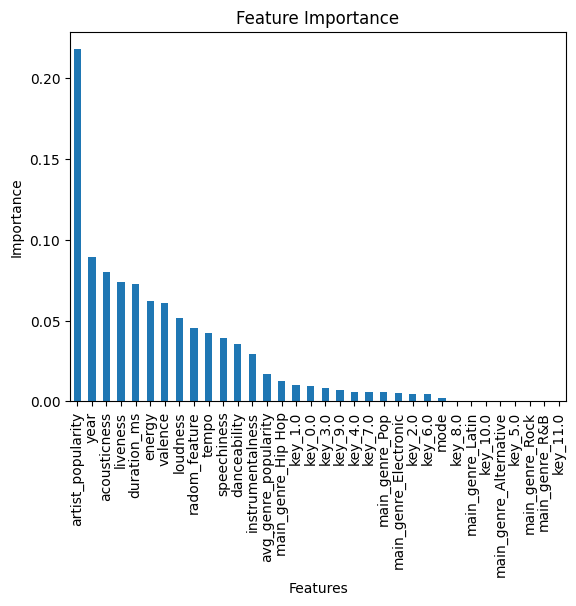

In [1689]:
best_tree_model = tree.best_estimator_

# Extract feature importances
feature_importances = best_tree_model.feature_importances_

# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Create a pandas Series to view the feature importances for better readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, you can plot the feature importances for a visual representation
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

#### Analysing Features influence

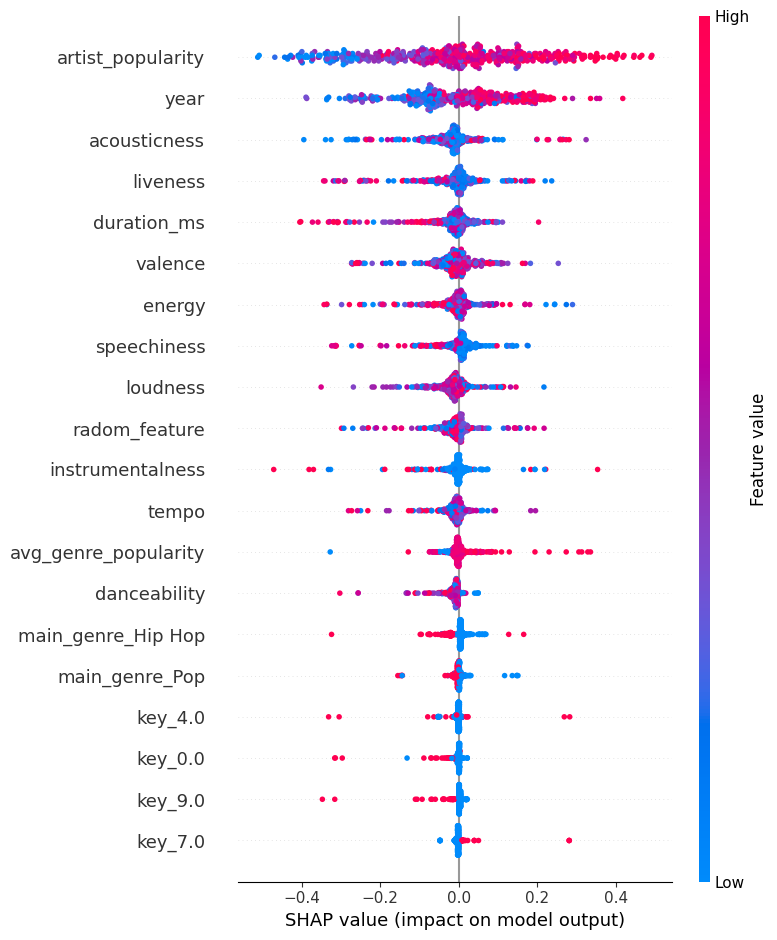

In [1690]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(best_tree_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)

### Bagging

#### Bagging with Grid Search

In [1691]:
# Initialize the base estimator with class weights
base_estimator = DecisionTreeClassifier(class_weight=class_weights_dict)

# Initialize the Bagging classifier with the base estimator
bagging_model = BaggingClassifier(estimator=base_estimator, bootstrap=True, oob_score=True)

# Define the parameter grid to search (using the correct double underscore for nested parameters)
param_grid = {
    'n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],  # Corrected parameter name
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2%}")

# Optional: Fit the model using the best parameters found
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)
accBGrid = best_model.oob_score_
predictions = best_model.predict(X_test)
accuracyBGrid = accuracy_score(Y_test, predictions)
precisionBGrid = precision_score(Y_test, predictions)
recallBGrid = recall_score(Y_test, predictions)
f1BGrid = f1_score(Y_test, predictions)
roc_aucBGrid = roc_auc_score(Y_test, predictions)

print(f"Accuracy OOB set - Bagging with Grid Searching: {accBGrid:.2%}")
print(f"Accuracy on test set of Bagging with Grid Searching: {accuracyBGrid:.2%}")
print("Precision test set of  Bagging with Grid Searching: {0:.2%}".format(precisionBGrid))
print("Recall test set of  Bagging with Grid Searching: {0:.2%}".format(recallBGrid))
print("F1-score test set of  Bagging with Grid Searching: {0:.2%}".format(f1BGrid))
print("ROC AUC test set of  Bagging with Grid Searching: {0:.2%}".format(roc_aucBGrid))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   2.3s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   2.3s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   2.4s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   2.3s
[CV] END ........estimator__max_depth=None, n_estimators=100; total time=   2.4s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   8.2s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   8.3s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   8.1s
[CV] END ..........estimator__max_depth=10, n_estimators=100; total time=   2.3s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   8.5s
[CV] END ........estimator__max_depth=None, n_estimators=200; total time=   9.0s
[CV] END ..........estimator__max_depth=10, n_es

#### Feature Importance

Feature Importances:
 artist_popularity         0.204822
year                      0.093203
acousticness              0.066059
radom_feature             0.061965
valence                   0.059355
speechiness               0.058663
liveness                  0.057522
duration_ms               0.056676
energy                    0.056330
danceability              0.052750
tempo                     0.050818
loudness                  0.044062
instrumentalness          0.033091
avg_genre_popularity      0.015737
key_5.0                   0.008581
key_1.0                   0.006985
key_9.0                   0.006818
key_6.0                   0.005920
key_8.0                   0.005770
mode                      0.005289
key_2.0                   0.005205
key_0.0                   0.004905
main_genre_Rock           0.004799
key_7.0                   0.004739
key_11.0                  0.004594
key_4.0                   0.004421
main_genre_Hip Hop        0.004214
key_10.0                  0.00407

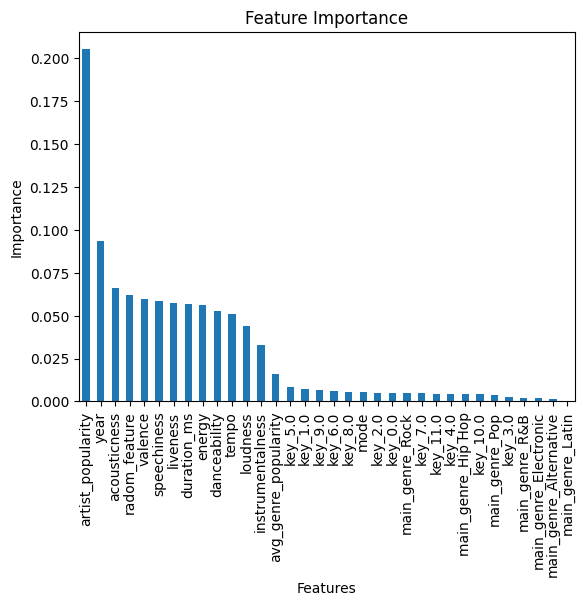

In [1692]:
import numpy as np

# Assuming each base estimator in the bagging model is a decision tree,
# we can access their individual feature importances and then average them.

# Extract feature importances from each base estimator
feature_importances = np.mean([
    tree.feature_importances_ for tree in best_model.estimators_
], axis=0)

# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)
print(len(feature_importance_series))

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


### Random Forest

#### Random Forest Grid Search

In [1693]:
param_grid_rf = {
    'min_samples_leaf': [3, 4, 5, 6],
    'max_features': [10, 15, 20, 25, 'auto', 'sqrt'],
}

model_rf = RandomForestClassifier(n_estimators=200, oob_score=True, class_weight=class_weights_dict)
RFGrid = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, verbose=2) 
RFGrid.fit(X_train, Y_train)
print("Best params for RF Grid Search: ", RFGrid.best_params_)

model_rf_best = RandomForestClassifier(n_estimators=200, oob_score=True, 
                                       max_features=RFGrid.best_params_["max_features"], 
                                       min_samples_leaf=RFGrid.best_params_["min_samples_leaf"], 
                                       class_weight=class_weights_dict)
model_rf_best.fit(X_train, Y_train)
accRFGrid = model_rf_best.oob_score_
predictions = model_rf_best.predict(X_test)
accuracyRFGrid = accuracy_score(Y_test, predictions)
precisionRFGrid = precision_score(Y_test, predictions)
recallRFGrid = recall_score(Y_test, predictions)
f1RFGrid = f1_score(Y_test, predictions)
roc_aucRFGrid = roc_auc_score(Y_test, predictions)

print(f"Accuracy OOB set - RF with Grid Searching: {accRFGrid:.2%}")
print(f"Accuracy on test set of RF with Grid Searching: {accuracyRFGrid:.2%}")
print("Precision test set of  RF with Grid Searching: {0:.2%}".format(precisionRFGrid))
print("Recall test set of  RF with Grid Searching: {0:.2%}".format(recallRFGrid))
print("F1-score test set of  RF with Grid Searching: {0:.2%}".format(f1RFGrid))
print("ROC AUC test set of  RF with Grid Searching: {0:.2%}".format(roc_aucRFGrid))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ................max_features=10, min_samples_leaf=3; total time=   0.9s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   0.9s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=3; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=4; total time=   0.8s
[CV] END ................max_features=10, min_samples_leaf=5; total time=   0.8s
[CV] END ................max_features=10, min_s


20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/bernardonobrepalma/Library/Python/3.9/lib/python/site-packa

Best params for RF Grid Search:  {'max_features': 25, 'min_samples_leaf': 3}
Accuracy OOB set - RF with Grid Searching: 77.81%
Accuracy on test set of RF with Grid Searching: 76.30%
Precision test set of  RF with Grid Searching: 54.95%
Recall test set of  RF with Grid Searching: 42.37%
F1-score test set of  RF with Grid Searching: 47.85%
ROC AUC test set of  RF with Grid Searching: 65.19%


#### Feaature Importance

Feature Importances:
 artist_popularity         0.219708
year                      0.114473
speechiness               0.067494
acousticness              0.065143
duration_ms               0.058539
valence                   0.058096
liveness                  0.057461
radom_feature             0.055025
danceability              0.053809
energy                    0.049583
tempo                     0.047147
loudness                  0.042708
instrumentalness          0.030617
avg_genre_popularity      0.017102
key_5.0                   0.008085
mode                      0.006765
main_genre_Rock           0.005597
main_genre_Pop            0.005280
key_1.0                   0.004594
key_6.0                   0.004347
key_9.0                   0.003929
main_genre_Hip Hop        0.003131
key_0.0                   0.003027
key_2.0                   0.002811
key_7.0                   0.002741
key_11.0                  0.002665
key_8.0                   0.002557
key_4.0                   0.00233

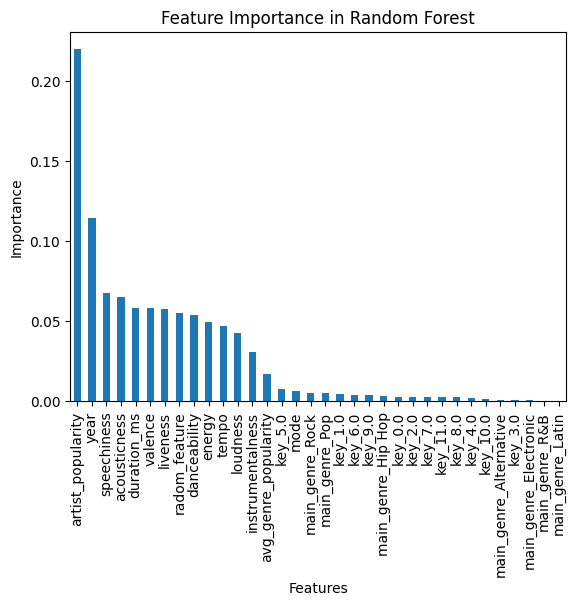

In [1694]:
# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Extract feature importances from the best random forest model
feature_importances = model_rf_best.feature_importances_

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


#### Feature Values impact on Popularity

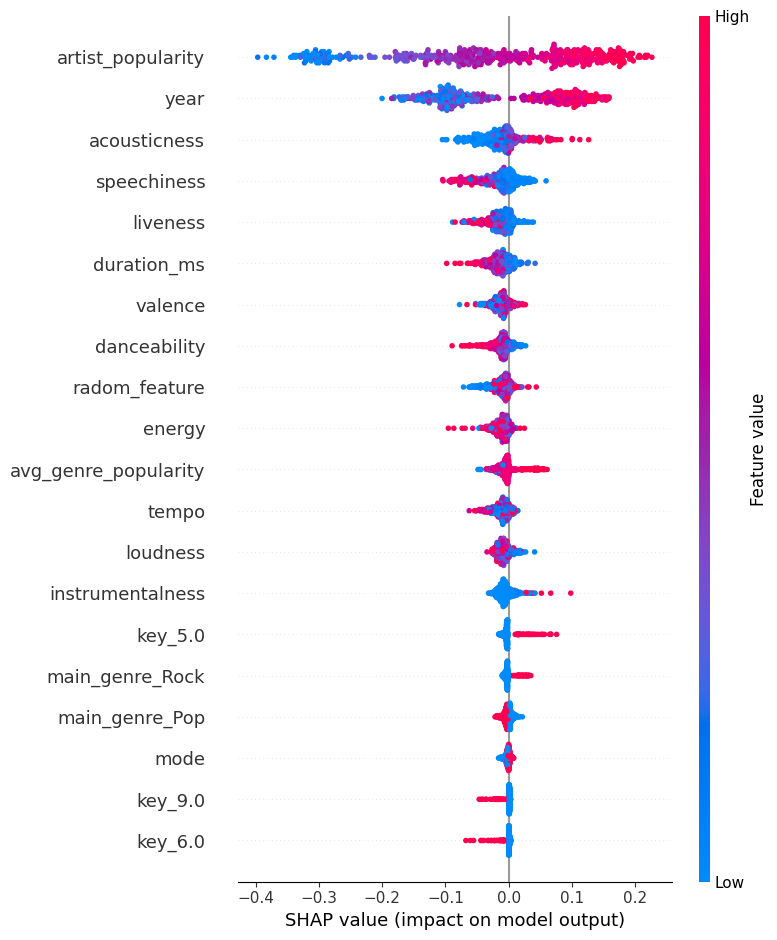

In [1695]:
import shap

# Initialize the SHAP Explainer with your best RandomForest model
explainer = shap.TreeExplainer(model_rf_best)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show the effect of each feature value on the model's output
shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)


### Boosting

#### Boosting with Grid Search

In [1696]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

xgbGrid = GridSearchCV(XGBClassifier(), params, cv=5, scoring='f1', verbose=2)
xgbGrid.fit(X_train, Y_train)

# Access the best model
best_xgb = xgbGrid.best_estimator_
print("Best params for Boosting Grid Search: ", xgbGrid.best_params_)
# Make predictions on the test set
predictions_xgb = best_xgb.predict(X_test)

# Calculate and print various metrics
accBoostGD = accuracy_score(Y_test, predictions_xgb)
precisionBoostGD = precision_score(Y_test, predictions_xgb)
recallBoostGD = recall_score(Y_test, predictions_xgb)
f1BoostGD = f1_score(Y_test, predictions_xgb)
roc_aucBoostGD = roc_auc_score(Y_test, predictions_xgb)

print("Accuracy test set of XGBClassifier: {0:.2%}".format(accBoostGD))
print("Precision test set of XGBClassifier: {0:.2%}".format(precisionBoostGD))
print("Recall test set of XGBClassifier: {0:.2%}".format(recallBoostGD))
print("F1-score test set of XGBClassifier: {0:.2%}".format(f1BoostGD))
print("ROC AUC test set of XGBClassifier: {0:.2%}".format(roc_aucBoostGD))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1

In [1697]:
print("Best params for Boosting Grid Search: ", xgbGrid.best_params_)

Best params for Boosting Grid Search:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


#### Feature Importance

Feature Importances:
 artist_popularity         0.086338
main_genre_Rock           0.069873
main_genre_Hip Hop        0.060144
key_4.0                   0.059548
year                      0.046818
avg_genre_popularity      0.042565
key_8.0                   0.040628
key_1.0                   0.038723
key_5.0                   0.038022
key_6.0                   0.036623
key_2.0                   0.031571
key_10.0                  0.031111
key_7.0                   0.029359
acousticness              0.028407
radom_feature             0.028129
main_genre_Electronic     0.026356
speechiness               0.026163
main_genre_Pop            0.025881
key_9.0                   0.025530
duration_ms               0.025487
instrumentalness          0.024178
energy                    0.023879
loudness                  0.023634
tempo                     0.023588
liveness                  0.023200
valence                   0.021826
danceability              0.021353
mode                      0.02057

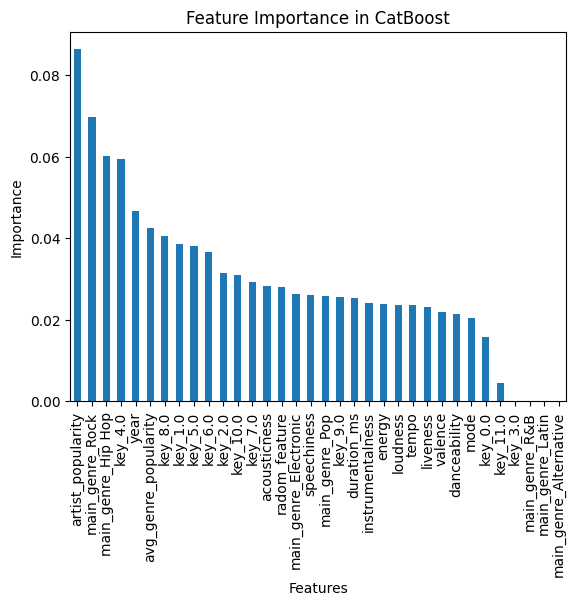

In [1698]:
# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Extract feature importances from the best random forest model
feature_importances = best_xgb.feature_importances_

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance in CatBoost')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

### KNN

#### Data Preparation for KNN

In [1699]:
data = data_dummies

In [1700]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns = ['year']
data = data.drop(columns=columns,axis=1)
columns = data.columns
standard_scaler = StandardScaler()
data = pd.DataFrame(standard_scaler.fit_transform(data), columns = columns)
data["year"] = song_data["year"]
data.columns


Index(['track_popularity', 'artist_popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'radom_feature', 'avg_genre_popularity', 'main_genre_Alternative', 'main_genre_Electronic', 'main_genre_Hip Hop', 'main_genre_Latin', 'main_genre_Pop', 'main_genre_R&B', 'main_genre_Rock', 'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'popularity', 'year'], dtype='object')

In [1701]:
if decide == 1:
    # Calculate quartile thresholds
    quantiles = data['track_popularity'].quantile([0.25, 0.5,0.75]).values

    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        elif popularity <= quantiles[2]:
            return 2  # High
        else:
            return 3  # Very High

    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 2:

    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    import pandas as pd

    # Assuming 'popularity' is a pandas series
    # We need to convert it to a numpy array and then reshape for sklearn
    X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

    # Create a binary target variable, for example, 1 if above median, 0 otherwise
    y = (popularity > np.median(popularity)).astype(int)

    # Initialize and train the decision tree
    tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
    tree_clf.fit(X, y)

    # Extract the threshold values
    thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

    # Print the thresholds - these can be used as bin edges
    print("Thresholds for binning:", thresholds)
    quantiles = data['track_popularity'].quantile(thresholds/100).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        else:
            return 1  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data

elif decide == 3:
    quantiles = data['track_popularity'].quantile([0.33, 0.66]).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        else:
            return 2  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 4:
    # Bin the data using the median as the threshold
    median_threshold = np.median(popularity)
    print(median_threshold)
    y_binned_median = (popularity > median_threshold).astype(int)
    print(y_binned_median)
    data['popularity'] = y_binned_median
    data = data.drop(columns='track_popularity')
    data

elif decide == 5:
    # Bin the data using the mean as the threshold
    mean_threshold = np.mean(popularity)
    y_binned_mean = (popularity > mean_threshold).astype(int)
    print(y_binned_mean)
    data['popularity'] = y_binned_mean
    data = data.drop(columns='track_popularity')
    data



Thresholds for binning: [72.5]


#### Splitting

In [1702]:
acc="accuracy" # our metric for Grid Searching

def split_df(dataframe, seed=seed, percentage=0.8):
    
    X = data.loc[:, dataframe.columns != 'popularity']
    y = data['popularity']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed, stratify=y) # note the stratify parameter

X_train, X_test, Y_train, Y_test = split_df(data, seed=42, percentage=0.8)
print("Number of explanatories: ", len(data.columns)-1)

Number of explanatories:  34


#### KNN with Grid Search

In [1703]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid: n_neighbors is a common parameter to tune for KNN.
# You can also tune 'weights' (uniform, distance) and 'metric' (euclidean, manhattan, etc.)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example: testing different numbers of neighbors
    'weights': ['uniform', 'distance'],  # How to weight the contribution of neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric for calculation
}

# Initialize GridSearchCV with KNN estimator
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2%}")

# Use the best estimator for further predictions
best_knn = grid_search.best_estimator_

# Predictions
predictions_KNN = best_knn.predict(X_test)


accKNGS = accuracy_score(Y_test, predictions_KNN)
precisionKNGS = precision_score(Y_test, predictions_KNN)
recallKNGS = recall_score(Y_test, predictions_KNN)
f1KNGS = f1_score(Y_test, predictions_KNN)
roc_aucKNGS = roc_auc_score(Y_test, predictions_KNN)

# Print all metrics
print("Accuracy test set of KNeighborsClassifier: {0:.2%}".format(accKNGS))
print("Precision test set of KNeighborsClassifier: {0:.2%}".format(precisionKNGS))
print("Recall test set of KNeighborsClassifier: {0:.2%}".format(recallKNGS))
print("F1-score test set of KNeighborsClassifier: {0:.2%}".format(f1KNGS))
print("ROC AUC test set of KNeighborsClassifier: {0:.2%}".format(roc_aucKNGS))



Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score: 74.01%
Accuracy test set of KNeighborsClassifier: 73.26%
Precision test set of KNeighborsClassifier: 46.84%
Recall test set of KNeighborsClassifier: 31.36%
F1-score test set of KNeighborsClassifier: 37.56%
ROC AUC test set of KNeighborsClassifier: 59.54%


### CatBoost

#### CatBoost with Grid Search

In [1704]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
catboost_params = {
    'n_estimators': [100, 200, 300],
    'depth': [4, 6, 8],  # Note: CatBoost uses 'depth' instead of 'max_depth'
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]  # For CatBoost, use 'bootstrap_type': 'Bernoulli' and 'subsample': <value> in combination
}

# Initialize the GridSearchCV object for CatBoostClassifier
catboost_grid = GridSearchCV(CatBoostClassifier(class_weights=class_weights_dict, verbose=0, bootstrap_type='Bernoulli'), 
                             catboost_params, cv=5, scoring='f1', verbose=2)

# Fit the model
catboost_grid.fit(X_train, Y_train)

# Access the best model
best_catboost = catboost_grid.best_estimator_

# Make predictions on the test set
predictions_catboost_grid = best_catboost.predict(X_test)

# Calculate and print various metrics
accCatBoostGD = accuracy_score(Y_test, predictions_catboost_grid)
precisionCatBoostGD = precision_score(Y_test, predictions_catboost_grid)
recallCatBoostGD = recall_score(Y_test, predictions_catboost_grid)
f1CatBoostGD = f1_score(Y_test, predictions_catboost_grid)
roc_aucCatBoostGD = roc_auc_score(Y_test, predictions_catboost_grid)

print("Accuracy test set of CatBoostClassifier with GridSearch: {0:.2%}".format(accCatBoostGD))
print("Precision test set of CatBoostClassifier with GridSearch: {0:.2%}".format(precisionCatBoostGD))
print("Recall test set of CatBoostClassifier with GridSearch: {0:.2%}".format(recallCatBoostGD))
print("F1-score test set of CatBoostClassifier with GridSearch: {0:.2%}".format(f1CatBoostGD))
print("ROC AUC test set of CatBoostClassifier with GridSearch: {0:.2%}".format(roc_aucCatBoostGD))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END depth=4, learning_rate=0.01, 

In [1705]:
print("Best params for Boosting Grid Search: ", catboost_grid.best_params_)

Best params for Boosting Grid Search:  {'depth': 8, 'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.6}


#### Feature Importance

Feature Importances:
 artist_popularity         22.139066
year                      13.240333
acousticness               6.006071
speechiness                5.160293
avg_genre_popularity       4.982055
liveness                   4.956560
duration_ms                4.911466
instrumentalness           4.764430
mode                       4.735409
radom_feature              4.591400
tempo                      4.568801
valence                    4.045311
energy                     3.619268
danceability               3.547550
loudness                   2.810078
main_genre_Pop             1.311342
main_genre_Rock            1.291503
main_genre_Hip Hop         0.868723
key_5.0                    0.659580
key_4.0                    0.211130
key_0.0                    0.197436
key_6.0                    0.195234
key_9.0                    0.181890
key_7.0                    0.173923
key_11.0                   0.170074
key_1.0                    0.142084
key_10.0                   0.141211
key_8.

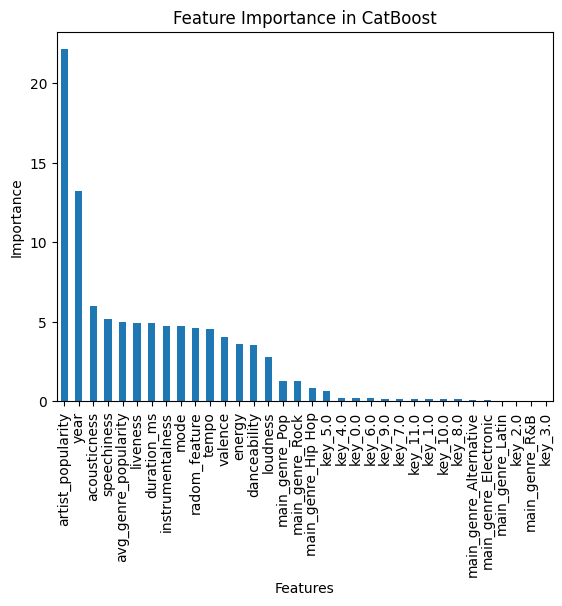

In [1706]:
# Assuming you have a list of feature names corresponding to X_train columns
feature_names = X_train.columns

# Extract feature importances from the best random forest model
feature_importances = best_catboost.feature_importances_

# Create a pandas Series for readability
import pandas as pd

feature_importance_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_series)

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

feature_importance_series.plot(kind='bar')
plt.title('Feature Importance in CatBoost')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

## Summary of Results 

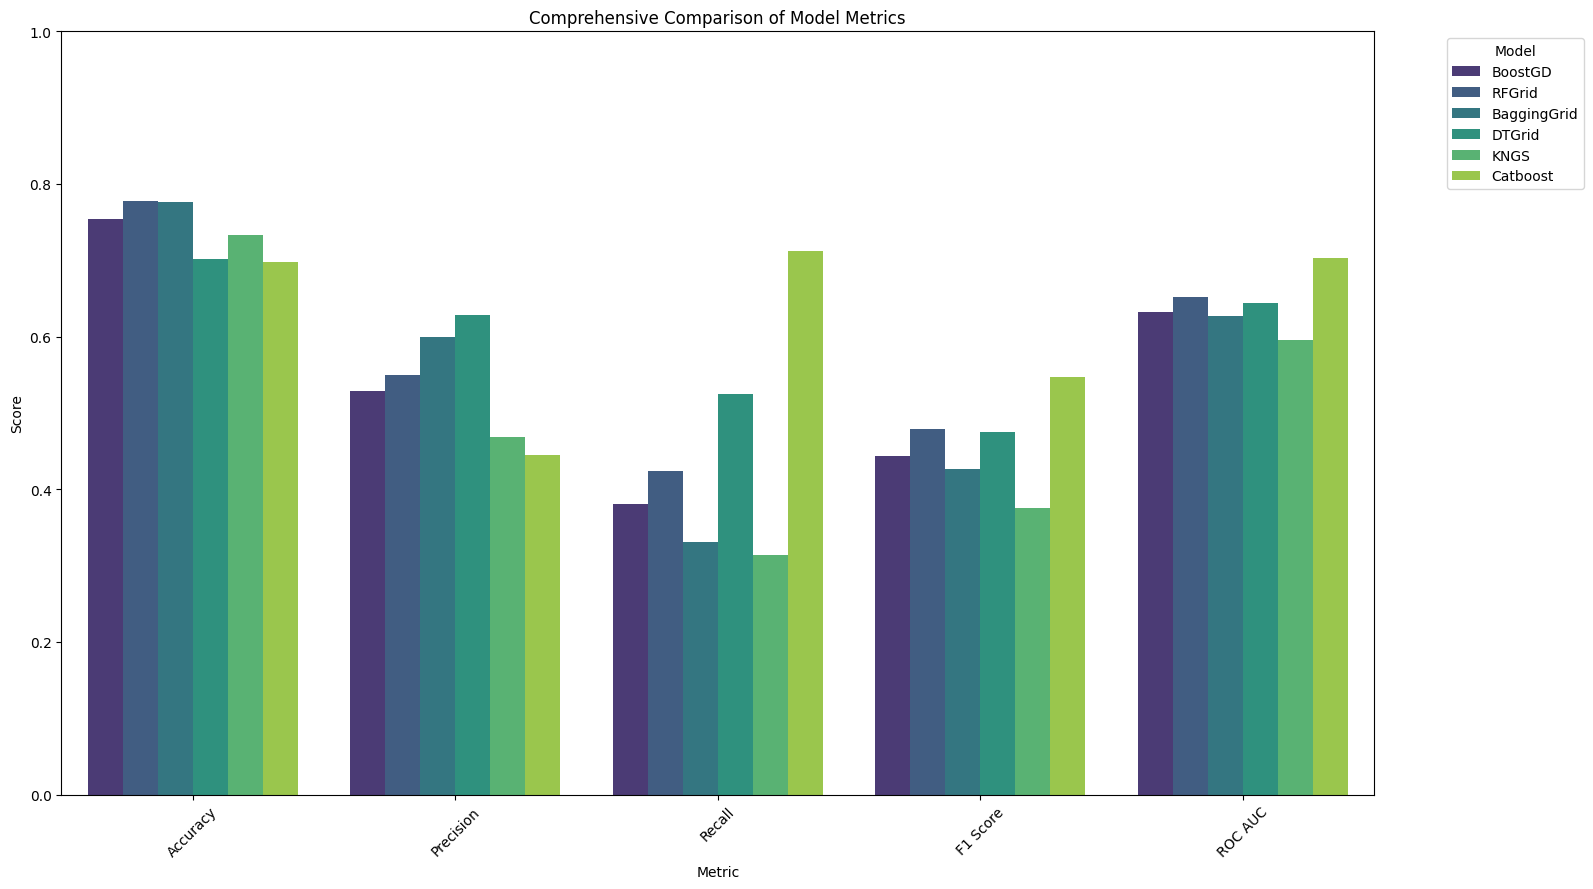

In [1707]:
# Adding KNN metrics to the data dictionary
data = {
    'Model': ['BoostGD', 'BoostGD', 'BoostGD', 'BoostGD', 'BoostGD',
              'RFGrid', 'RFGrid', 'RFGrid', 'RFGrid', 'RFGrid',
              'BaggingGrid', 'BaggingGrid', 'BaggingGrid', 'BaggingGrid', 'BaggingGrid',
              'DTGrid', 'DTGrid', 'DTGrid', 'DTGrid', 'DTGrid',
              'KNGS', 'KNGS', 'KNGS', 'KNGS', 'KNGS',
              'Catboost','Catboost','Catboost','Catboost','Catboost'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'] * 6,
    'Score': [accBoostGD, precisionBoostGD, recallBoostGD, f1BoostGD, roc_aucBoostGD,
              accRFGrid, precisionRFGrid, recallRFGrid, f1RFGrid, roc_aucRFGrid,
              accBGrid,precisionBGrid,recallBGrid,f1BGrid,roc_aucBGrid,
              accDTGrid,precisionDTGrid,recallDTGrid,f1DTGrid,roc_aucDTGrid,
              accKNGS,precisionKNGS,recallKNGS,f1KNGS,roc_aucKNGS,
              accCatBoostGD,precisionCatBoostGD,recallCatBoostGD,f1CatBoostGD,roc_aucCatBoostGD]
             
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Creating the bar plot
plt.figure(figsize=(16, 9))
sns.barplot(x='Metric', y='Score', hue='Model', data=df, palette='viridis')

plt.title('Comprehensive Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming score values are between 0 and 1
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

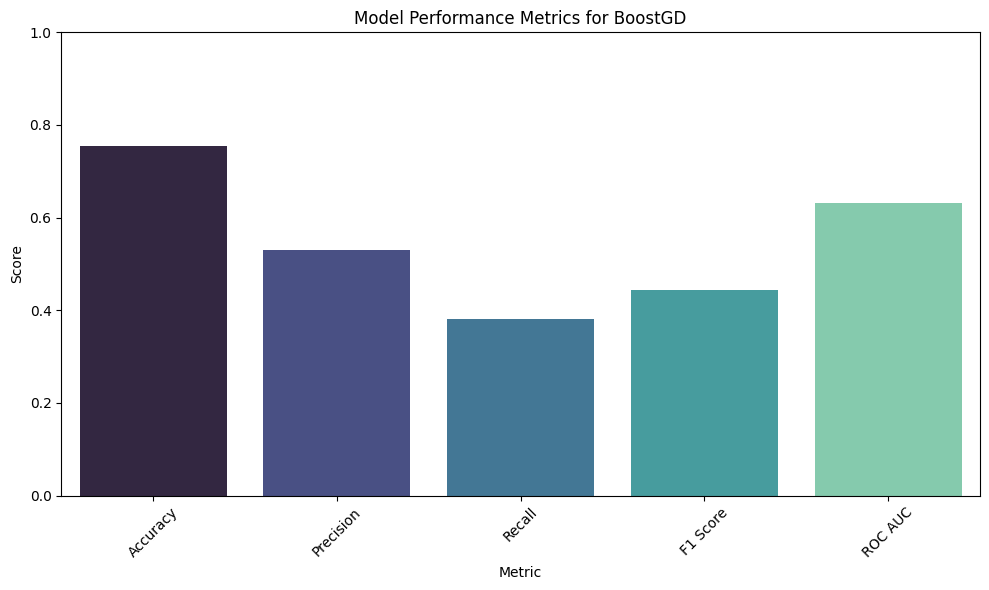

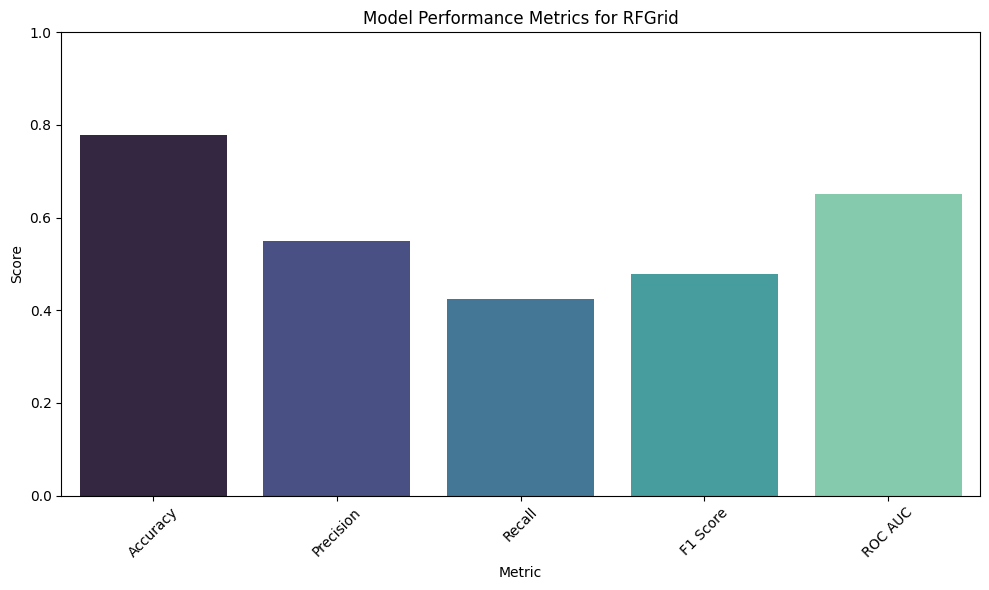

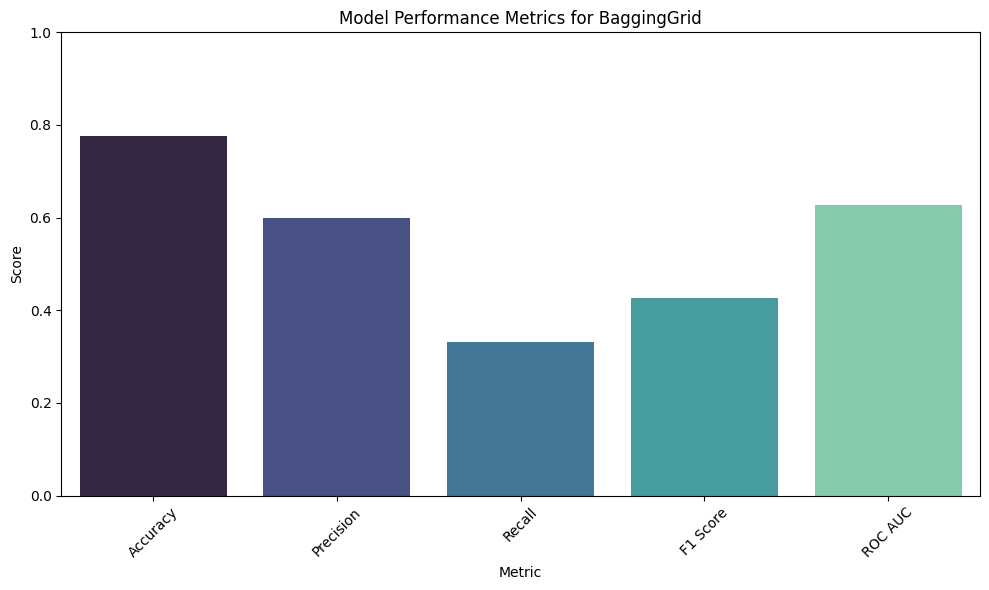

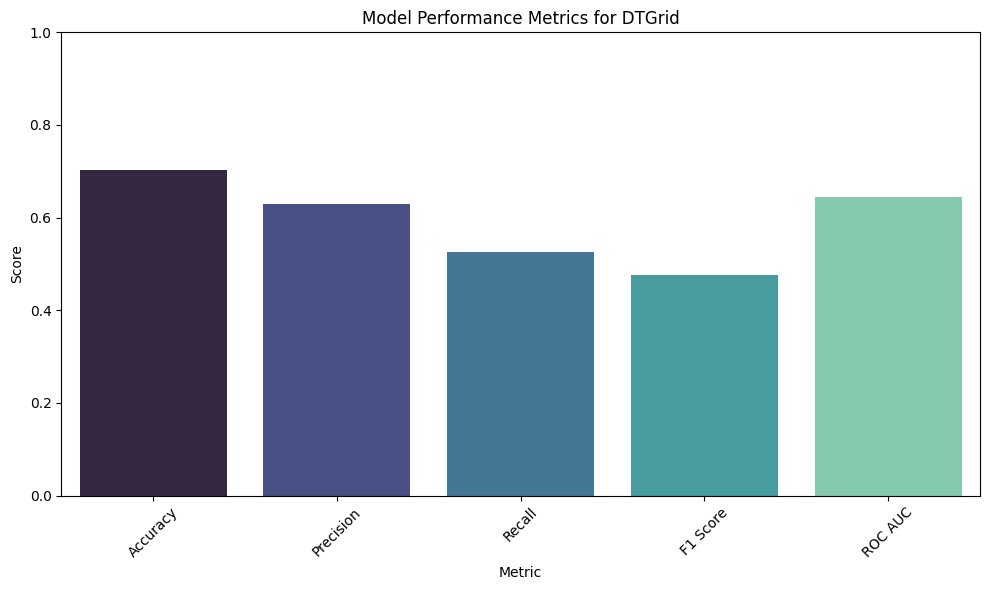

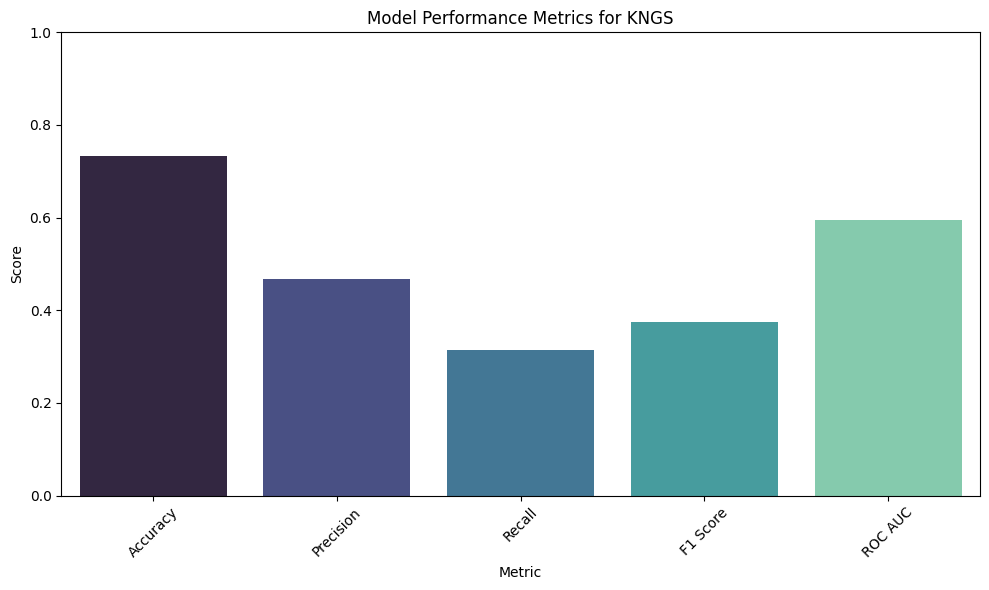

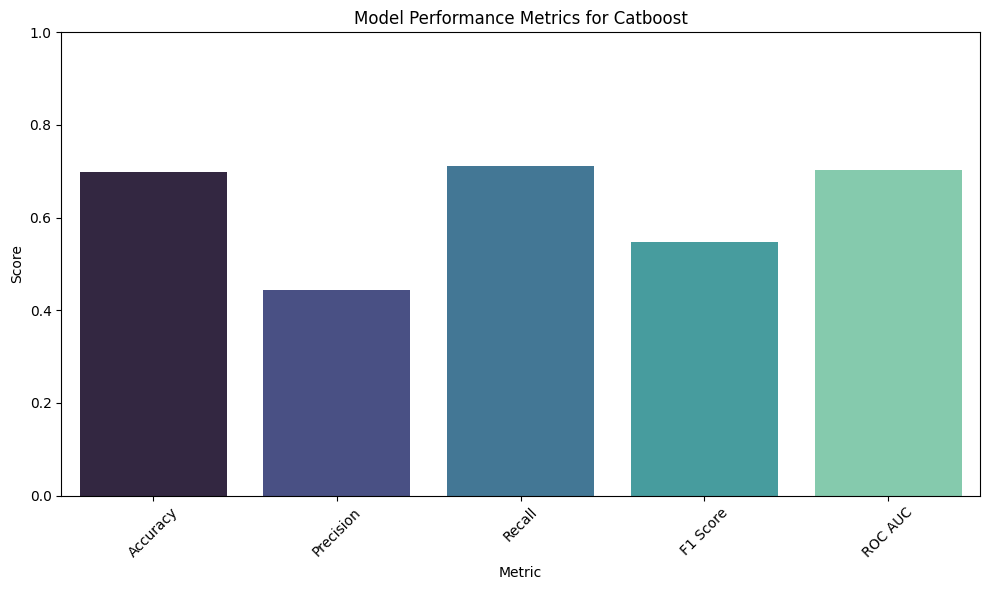

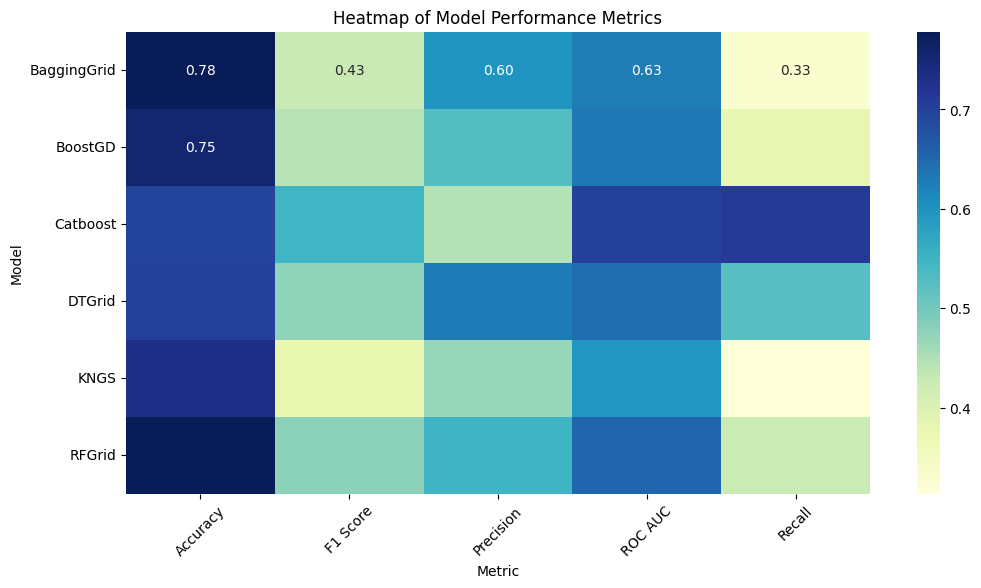

In [1708]:
# Creating a function to plot each model's performance metrics
def plot_model_performance(df, model_name):
    df_model = df[df['Model'] == model_name]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Score', data=df_model, palette='mako')
    plt.title(f'Model Performance Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Assuming score values are between 0 and 1
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of unique models in the DataFrame
unique_models = df['Model'].unique()

# Plotting performance metrics for each unique model
for model in unique_models:
    plot_model_performance(df, model)

# Creating a pivot table for the heatmap using the correct pandas function
heatmap_data = pd.pivot_table(df, values='Score', index='Model', columns='Metric')

# Now we will plot the heatmap again
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Model Performance Metrics')
plt.yticks(rotation=0)  # Keep the model names horizontal for readability
plt.xticks(rotation=45)
plt.show()

# GUNS N ROSES CASE STUDY

In [1724]:
print(X_test.columns)

Index(['artist_popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'radom_feature', 'avg_genre_popularity', 'main_genre_Alternative', 'main_genre_Electronic', 'main_genre_Hip Hop', 'main_genre_Latin', 'main_genre_Pop', 'main_genre_R&B', 'main_genre_Rock', 'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'year'], dtype='object')


In [1757]:
test_data = pd.DataFrame({
    'artist_popularity': [0],
    'danceability': [0.3],
    'energy': [0.8],
    'loudness': [-4.0],
    'mode': [0],
    'speechiness': [0.05],
    'acousticness': [0.01],
    'instrumentalness': [0.1],
    'liveness': [0.2],
    'valence': [0.5],
    'tempo': [120],
    'duration_ms': [24000],
    'radom_feature': [0.5],
    'avg_genre_popularity': [75],
    'main_genre_Alternative': [0],
    'main_genre_Electronic': [0],
    'main_genre_Hip Hop': [0],
    'main_genre_Latin': [0],
    'main_genre_Pop': [0],
    'main_genre_R&B': [0],
    'main_genre_Rock': [1],
    'key_0.0': [0],
    'key_1.0': [0],
    'key_2.0': [0],
    'key_3.0': [0],
    'key_4.0': [0],
    'key_5.0': [0],
    'key_6.0': [0],
    'key_7.0': [0],
    'key_8.0': [0],
    'key_9.0': [1],
    'key_10.0': [0],
    'key_11.0': [0],
    'year': [2008],
})
print(test_data)
# Reorder the columns in test_data to match the training DataFrame's column order
correct_column_order = [
    'artist_popularity', 'danceability', 'energy', 'loudness', 'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
    'tempo', 'duration_ms', 'radom_feature', 'avg_genre_popularity', 
    'main_genre_Alternative', 'main_genre_Electronic', 'main_genre_Hip Hop', 
    'main_genre_Latin', 'main_genre_Pop', 'main_genre_R&B', 'main_genre_Rock', 
    'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 
    'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'year'
]

# Assuming test_data is your DataFrame, reorder its columns to match the training DataFrame's column order
test_data = test_data[correct_column_order]

# Now, try predicting again with the reordered DataFrame
predictions_catboost_grid = best_catboost.predict(test_data)



   artist_popularity  danceability  energy  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  radom_feature  avg_genre_popularity  main_genre_Alternative  main_genre_Electronic  main_genre_Hip Hop  main_genre_Latin  main_genre_Pop  main_genre_R&B  main_genre_Rock  key_0.0  key_1.0  key_2.0  key_3.0  key_4.0  key_5.0  key_6.0  key_7.0  key_8.0  key_9.0  key_10.0  key_11.0  year
0                  0           0.3     0.8      -4.0     0         0.05          0.01               0.1       0.2      0.5    120        24000            0.5                    75                       0                      0                   0                 0               0               0                1        0        0        0        0        0        0        0        0        0        1         0         0  2008


In [1758]:
print(predictions_catboost_grid)

[0]
